# Gensim word vector visualization of various word vectors

In [1]:
# install gensim, it's not available on conda by default
!conda install -y gensim

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/pytorch_p36

  added / updated specs: 
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tbb4py-2019.8              |   py36hfd86e86_0         253 KB
    bz2file-0.98               |           py36_1          13 KB
    certifi-2019.11.28         |           py36_0         156 KB
    scipy-1.1.0                |   py36hfa4b5c9_1        18.0 MB
    smart_open-1.9.0           |             py_0          59 KB
    mkl_random-1.0.1           |   py36h4414c95_1         373 KB
    tbb-2019.8                 |       hfd86e86_0         1.4 MB
    ca-certificates-2019.11.27 |                0         132 KB

In [2]:
import os
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [3]:
# file glove.6B.100d.txt is already downloaded and included in the git repository so no need to do this unless you need 6B.50d, 6B.200d, or 6B.300d as well!
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-01-07 21:42:28--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-07 21:42:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.06MB/s    in 6m 27s  

2020-01-07 21:48:55 (2.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: 

In [4]:
glove_file = datapath(os.path.join(os.getcwd(),'glove.6B.100d.txt'))
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [7]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [8]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [9]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


![Analogy](./imgs/word2vec-king-queen-composition.png)

In [10]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [12]:
analogy('king', 'queen', 'man')

'woman'

In [13]:
analogy('japan', 'japanese', 'australia')

'australian'

In [14]:
analogy('australia', 'beer', 'france')

'champagne'

In [15]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [16]:
analogy('tall', 'tallest', 'long')

'longest'

In [17]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [18]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [19]:
def two_dim(model, words):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    return twodim

In [21]:
def two_dim(model, words):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    return twodim

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    twodim = two_dim(model, words)

    plt.figure(figsize=(50,50))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

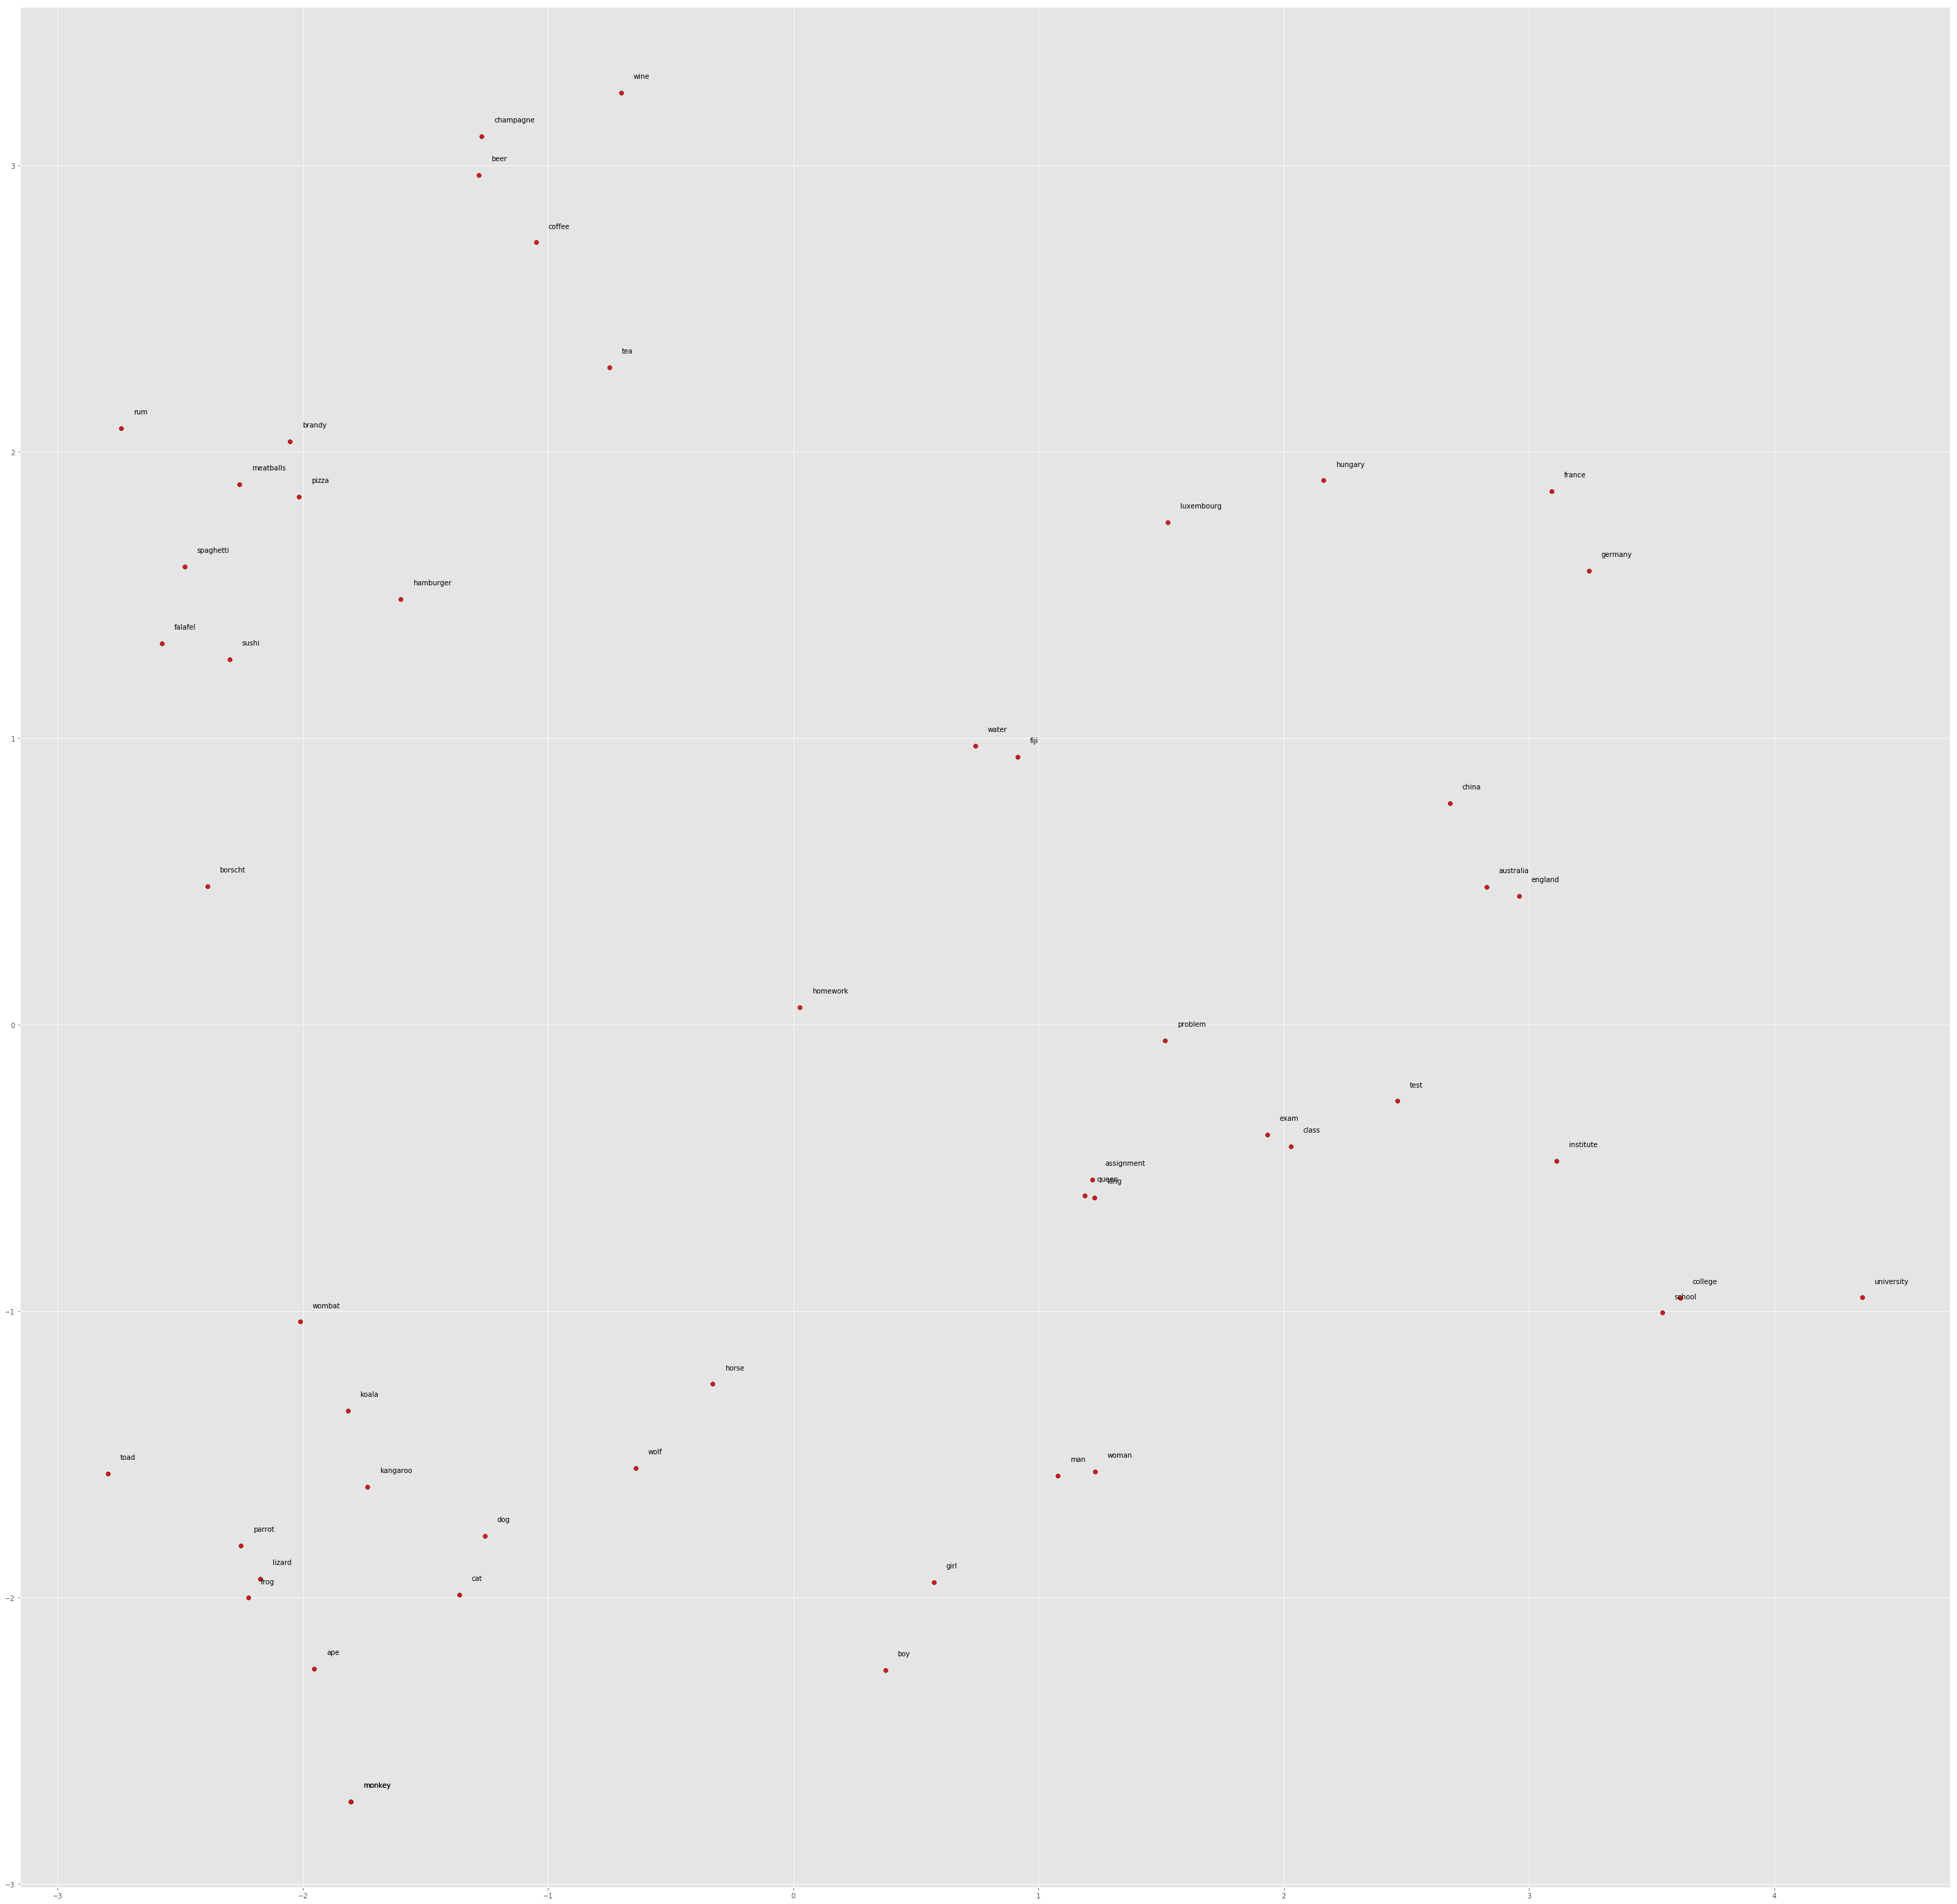

In [22]:
display_pca_scatterplot(model, 
                        ['queen', 'king', 'man', 'woman', 'boy', 'girl','coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china', 'england',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

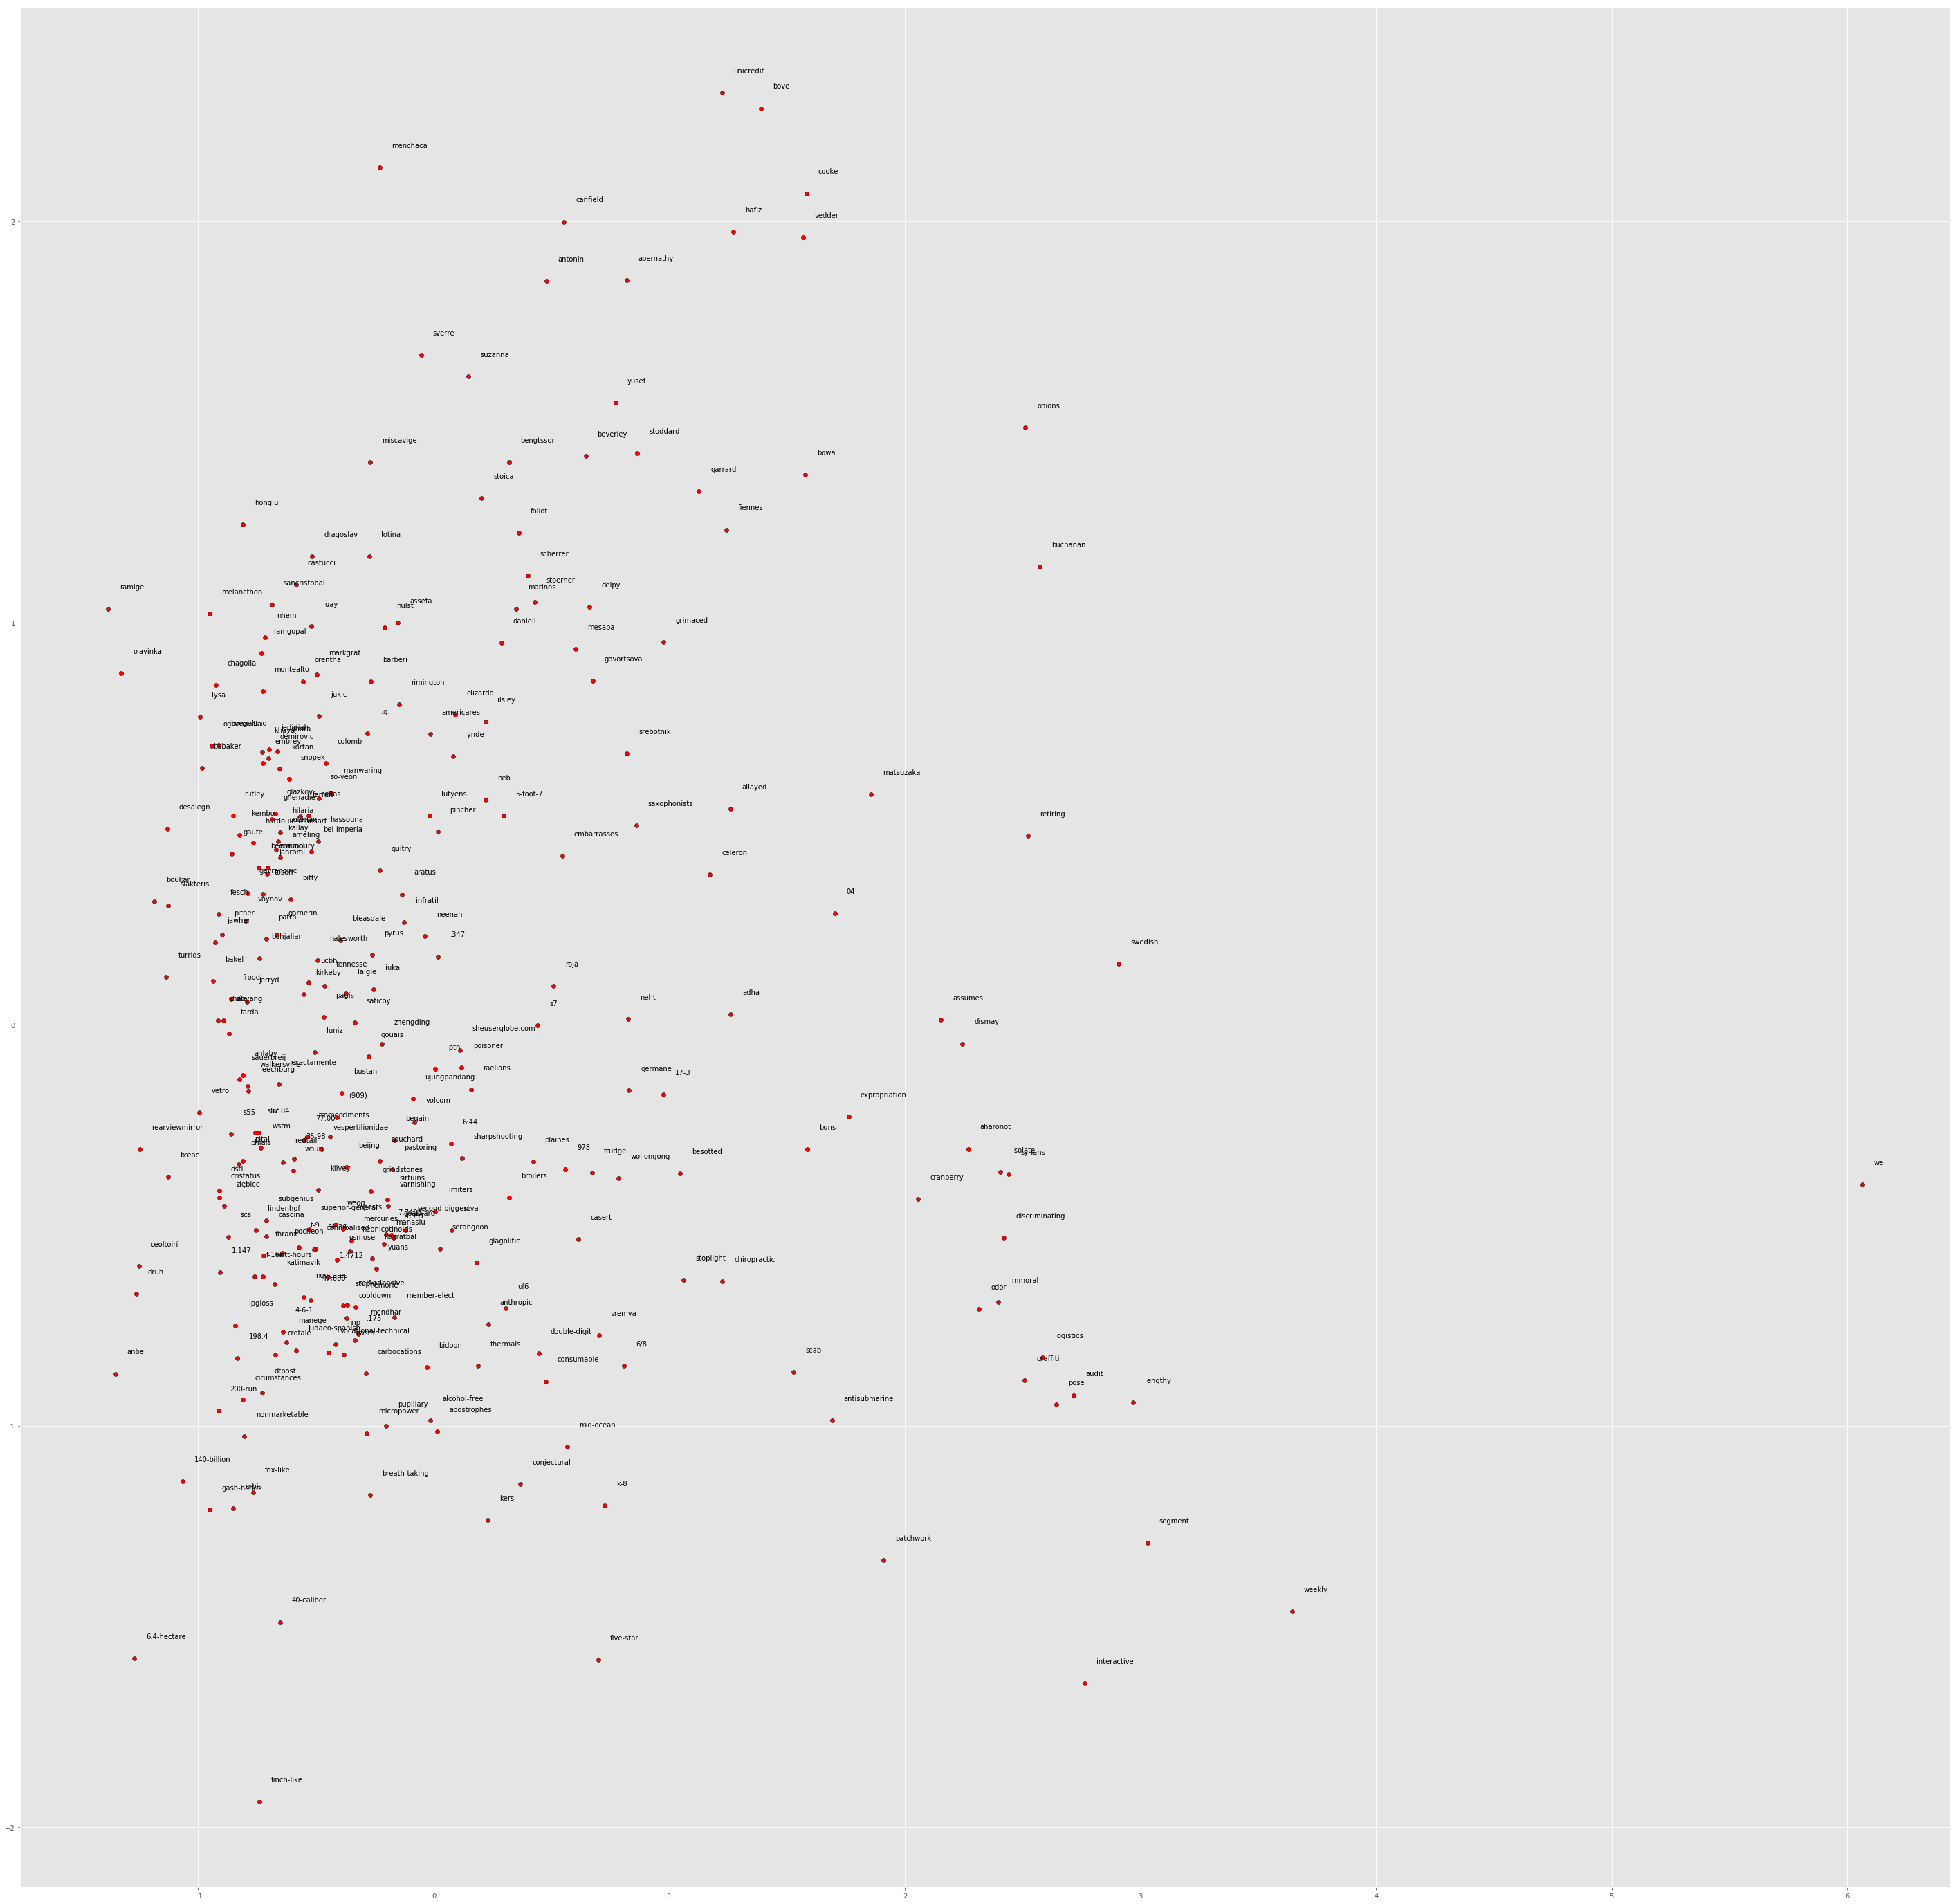

In [23]:
display_pca_scatterplot(model, sample=300)